**Performing EDA**
Exploratory Data Analysis (EDA) is a critical step in the data analysis process that involves investigating datasets to summarize their main characteristics, often using visual methods. EDA helps to understand the structure, patterns, trends, and anomalies in the data before formal modeling or hypothesis testing.

**Key Steps in EDA:**

**Data Collection:** Load the data from CSV, database, API, etc.
Check if the dataset is properly formatted and structured.
Initial Data Inspection:

**View the structure of the dataset**:
Check the number of rows and columns, data types, and column names using
head(), info(), and describe() methods in Python's pandas library.
Check for missing values: Identify columns with missing values using isnull() and analyze their extent.
Data Types: Ensure that the data types for each column are appropriate (e.g., dates as datetime, numerical values as integers or floats).

**Univariate Analysis:**

*   Descriptive statistics: Compute mean, median, standard deviation,
quantiles, etc., using describe() for numerical features.

*   Visualizations: Use histograms or bar plots to understand the distribution of individual variables.
matplotlib, seaborn, or plotly can be used for visualizations.

**Multivariate Analysis:**


*   **Correlation analysis:** Investigate relationships between two or more variables using correlation matrices and heatmaps.
*  Scatter plots and pair plots help visualize relationships between continuous variables.
*  Box plots can show the spread and outliers in categorical groupings.

**Outliers Detection:** Identify outliers in the data using box plots or z-score methods.
Decide whether to handle them by capping, removing, or transforming.

**Missing Data Handling:** Handle missing values by either dropping the missing data points or imputing them using methods like mean, median, or interpolation.

**Feature Transformation:** Consider transforming data (log transformations, normalization, or standardization) to prepare it for modeling.

**Categorical Data Analysis:** Analyze categorical features using frequency tables, bar plots, and count plots.
Convert categorical variables into numerical ones using techniques like one-hot encoding if necessary.

**Data Visualization:** Visualize trends, patterns, and potential relationships using charts like line plots, histograms, box plots, scatter plots, and heatmaps.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# to avoid line breaks
# # Adjust display options
# pd.set_option('display.max_colwidth', None)  # Set max column width to None
# pd.set_option('display.width', None)          # Use the full width of the output area
# pd.set_option('display.expand_frame_repr', False)  # Prevent DataFrame from being split across lines


netflix_df = pd.read_csv(r"/content/sample_data/netflix_data.csv")
# .head() to display first 5 rows
print(netflix_df.head())


  show_id     type  title           director                                                                                                                                                             cast        country         date_added  release_year  duration                                                                                                                                            description             genre
0      s2    Movie   7:19  Jorge Michel Grau                                                                         Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato         Mexico  December 23, 2016          2016        93   After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.            Dramas
1      s3    Movie  23:59       Gilbert Chan                                                     Tedd Chan, Stella Chung, Henley Hii, 

In [ ]:
# .tail() to display last 5 rows
print(netflix_df.tail())

     show_id   type       title         director                                                                                                                                   cast        country        date_added  release_year  duration                                                                                                                                             description     genre
4807   s7779  Movie  Zombieland  Ruben Fleischer                                    Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf  United States  November 1, 2019          2009        88               Looking to survive in a world taken over by zombies, a dorky college student teams with an urban roughneck and a pair of grifter sisters.  Comedies
4808   s7781  Movie         Zoo     Shlok Sharma                                              Shashank Arora, Shweta Tripathi, Rahul Kumar, Gopal K. Singh, Yogesh Kurme, Prince Daniel          I

In [ ]:
# .shape to check number of rows,columns
netflix_df.shape

(4812, 11)

In [ ]:
# .columns - to get a list of column names
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year',
       'duration', 'description', 'genre'],
      dtype='object')

In [ ]:
netflix_df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
duration,int64
description,object


In [ ]:
netflix_df['date_added'].head()

,date_added
0,"December 23, 2016"
1,"December 20, 2018"
2,"November 16, 2017"
3,"January 1, 2020"
4,"July 1, 2017"


In [ ]:
netflix_int = netflix_df.select_dtypes(include=['int'])
print(netflix_int.head())

   release_year  duration
0          2016        93
1          2011        78
2          2009        80
3          2008       123
4          2016         1


In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [ ]:
netflix_df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
duration,0
description,0


In [ ]:
# to check overall stastics for numerical values
netflix_df.describe()

,release_year,duration
count,4812.000000,4812.000000
mean,2012.711554,99.566708
std,9.517978,30.889305
min,1942.000000,1.000000
25%,2011.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,116.000000
max,2021.000000,253.000000


(array([ 169.,  102.,  418., 1912., 1470.,  550.,  154.,   27.,    7.,
           3.]),
 array([  1. ,  26.2,  51.4,  76.6, 101.8, 127. , 152.2, 177.4, 202.6,
        227.8, 253. ]),
 <BarContainer object of 10 artists>)

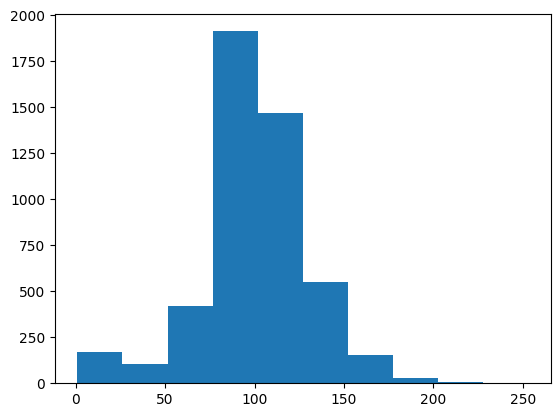

In [ ]:
plt.hist(netflix_df['duration'], bins=10)

In [ ]:
"""
The simplest way to count the occurrences of values in a Pandas DataFrame or Series is to use the value_counts()
This method returns a Series containing the counts of unique values in the input data
https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
"""
netflix_df['type'].value_counts()

,count
type,
Movie,4677
TV Show,135


In [ ]:
"""
The .groupby() method in pandas is a powerful function used for splitting a DataFrame into groups
based on the values of one or more columns.
It allows you to perform operations like aggregation, transformation, or filtering on these groups
"""

netflix_df.groupby('country')['type'].count().sort_values(ascending=False)


,type
country,
United States,1886
India,864
United Kingdom,311
Canada,155
France,133
...,...
Paraguay,1
Guatemala,1
Namibia,1


In [ ]:
"""
.value_counts(sort=True): This counts the occurrences of each unique value in the type column within each country.
By default, value_counts() sorts the output in descending order by count.
Sorting behavior: The .value_counts(sort=True) method sorts the result in descending order
 of the count of each unique type within each country.
"""
netflix_df.groupby('country')['type'].value_counts(sort=True)

country        type   
Argentina      Movie      45
               TV Show     1
Australia      Movie      49
               TV Show     1
Austria        Movie       5
                          ..
United States  TV Show    30
Uruguay        Movie       7
Venezuela      Movie       1
Vietnam        Movie       5
Zimbabwe       Movie       1
Name: count, Length: 97, dtype: int64

In [ ]:
"""
.size(): Counts the size (number of occurrences) for each group.
"""
netflix_df.groupby(['country', 'type']).size().sort_values(ascending=False)

,,0
country,type,
United States,Movie,1856
India,Movie,858
United Kingdom,Movie,289
Canada,Movie,151
France,Movie,129
...,...,...
Poland,TV Show,1
Russia,TV Show,1
Saudi Arabia,TV Show,1


In [ ]:
"""
The .unique() method in pandas is used to extract the unique values from a Series.
It returns an array of the unique values in the order they first appear.
This method is particularly useful for identifying distinct entries in a dataset, such as categories or different values in a column.
"""
netflix_df['country'].unique()


array(['Mexico', 'Singapore', 'United States', 'Turkey', 'Egypt', 'India',
       'Thailand', 'Nigeria', 'Norway', 'South Korea', 'Italy',
       'Indonesia', 'Canada', 'Romania', 'Spain', 'Iceland',
       'South Africa', 'France', 'Portugal', 'Hong Kong',
       'United Kingdom', 'Argentina', 'Germany', 'Denmark', 'Poland',
       'Japan', 'Kenya', 'New Zealand', 'Pakistan', 'Australia', 'China',
       'Taiwan', 'Netherlands', 'Philippines', 'United Arab', 'Brazil',
       'Iran', 'Israel', 'Uruguay', 'Bulgaria', 'Soviet Union',
       'Malaysia', 'Ireland', 'Serbia', 'Colombia', 'Peru', 'Chile',
       'Sweden', 'Ghana', 'Saudi Arabia', 'Namibia', 'Lebanon', 'Belgium',
       'Vietnam', 'Russia', 'Kuwait', 'Zimbabwe', 'Hungary', 'Finland',
       'Venezuela', 'Cambodia', 'Slovenia', 'Switzerland', 'Austria',
       'Bangladesh', 'Czech Republic', 'Georgia', 'Guatemala', 'Jamaica',
       'Paraguay', 'Somalia', 'Croatia'], dtype=object)

In [ ]:
# to count total countries
len(netflix_df['country'].unique())

72

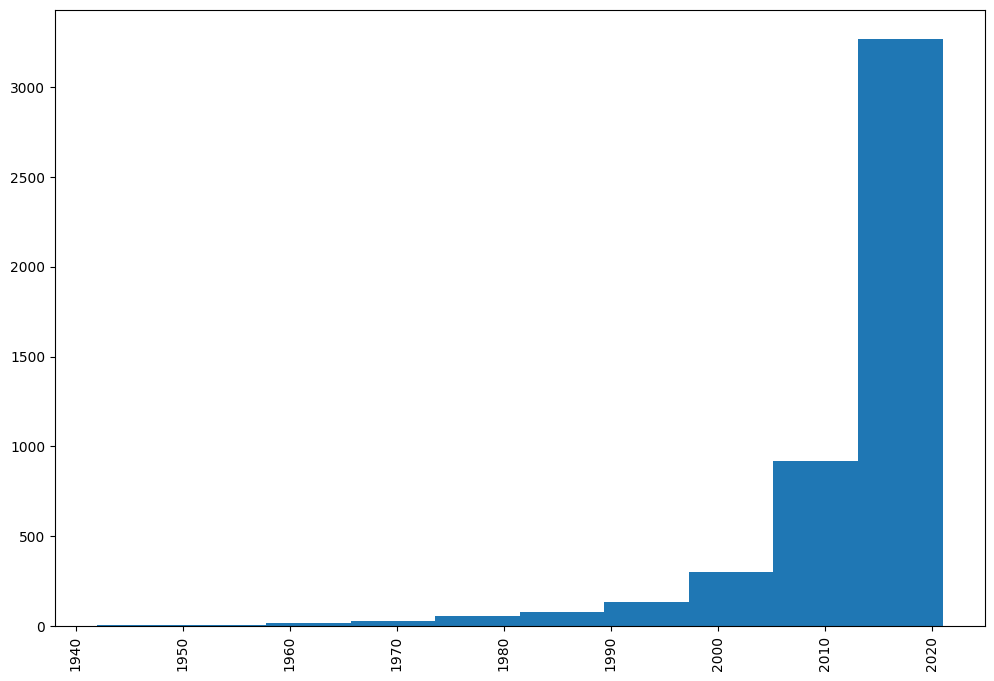

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(netflix_df['release_year'],bins=10)
plt.xticks(rotation= 90)
plt.show()

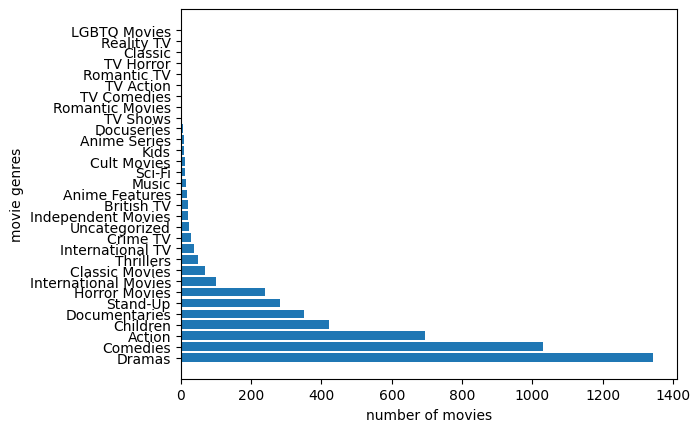

In [ ]:
"""
.index() gives you access to the row labels (the index) of the DataFrame or Series.
.values() gives you the actual underlying data (values) of the DataFrame or Series as a NumPy array.
"""

genre_counts = netflix_df['genre'].value_counts()
# print(genre_counts)
plt.barh(genre_counts.index,genre_counts.values)
plt.xlabel('number of movies')
plt.ylabel('movie genres')
plt.show()

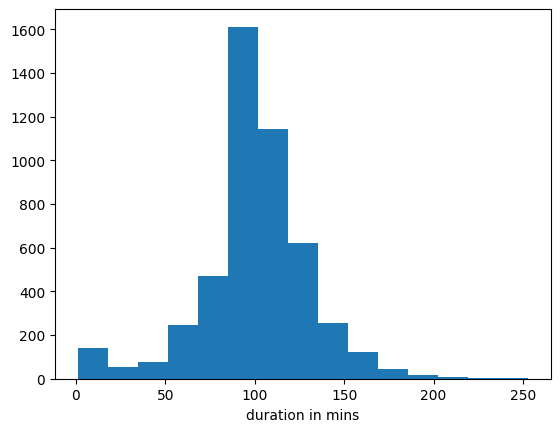

In [ ]:
plt.hist(netflix_df['duration'], bins=15)
plt.xlabel('duration in mins')
plt.show()

In [ ]:
print(netflix_df['duration'].max())
print(netflix_df['duration'].min())
print(netflix_df['duration'].mean())

253
1
99.56670822942644


In [ ]:
"""
What was the most frequent movie duration in the 1990s?
Save an approximate answer as an integer called duration
(use 1990 as the decade's start year).
"""
# method 1
# movie_1990s = netflix_df[(netflix_df['release_year'] >=1990) & (netflix_df['release_year'] < 2000)]
# movie_1990s.head()

# method 2
# movie_1990s = netflix_df[np.logical_and ((netflix_df['release_year'] >=1990),(netflix_df['release_year'] < 2000))]

# method 3
"""
.between() method in pandas includes both the lower and upper bounds by default. This means that when you use .between(),
the comparison is inclusive of the boundary values (i.e., both the start and end values are included in the result).
"""
movie_1990s = netflix_df[netflix_df['release_year'].between(1990,1999)]
print(movie_1990s.head())

    show_id   type                            title            director                                                                                                                                                                                                                                                             cast        country        date_added  release_year  duration                                                                                                                                                                                                                                      description     genre
6        s8  Movie                              187      Kevin Reynolds                                                                                                                                                                                      Samuel L. Jackson, John Heard, Kelly Rowan, Clifton Collins Jr., Tony Plana  United States  November 1, 2019  

In [ ]:
movie_only_1990s =  movie_1990s[movie_1990s['type'] == 'Movie']
#print(movie_1990s.shape)
duration_count = movie_only_1990s['duration'].value_counts().sort_values(ascending=False)
print(duration_count)
duration =duration_count.index[0]

# movie_only_1990s['duration'].mode()[0]

duration
94     7
101    6
108    5
93     5
96     5
      ..
141    1
30     1
135    1
78     1
191    1
Name: count, Length: 91, dtype: int64


94

In [ ]:
"""
A movie is considered short if it is less than 90 minutes.
Count the number of short action movies released in the 1990s and
save this integer as short_movie_count.
"""
short_movies = movie_1990s[(movie_1990s['duration'] < 90) & (movie_1990s['genre'] == 'Action') & (movie_1990s['type'] == 'Movie')]
#print(movie_1990s['genre'])
print(len(short_movies))
print(short_movies.shape[0])
print(short_movies['title'].count())


6               Dramas
118             Dramas
145           Comedies
167           Comedies
194             Dramas
             ...      
4672            Dramas
4689    Classic Movies
4718            Action
4746            Action
4756            Dramas
Name: genre, Length: 184, dtype: object
7
7
7


In [ ]:
short_movie_count = short_movies.shape[0]

In [ ]:
"""
Identify the top 3 directors who released the most movies in the 1990s.
Save the result as a DataFrame called top_directors_90s containing
the director's name and the count of movies they directed.
Ensure that the DataFrame is sorted in descending order by the number of movies directed.
"""
top_directors_90s = movie_1990s['director'].value_counts().head(3).reset_index()
print(type(top_directors_90s))
print(top_directors_90s)
# Rename the columns for clarity
top_directors_90s.columns = ['director', 'movie_count']
print(top_directors_90s)


<class 'pandas.core.frame.DataFrame'>
            director  count
0         Johnnie To      4
1       Subhash Ghai      3
2  Rajkumar Santoshi      3
            director  movie_count
0         Johnnie To            4
1       Subhash Ghai            3
2  Rajkumar Santoshi            3


In [ ]:
# Extra tips and useful methods
netflix_df['date_added'].info()
netflix_df['date_added'].head(10)

<class 'pandas.core.series.Series'>
RangeIndex: 4812 entries, 0 to 4811
Series name: date_added
Non-Null Count  Dtype 
--------------  ----- 
4812 non-null   object
dtypes: object(1)
memory usage: 37.7+ KB


,date_added
0,"December 23, 2016"
1,"December 20, 2018"
2,"November 16, 2017"
3,"January 1, 2020"
4,"July 1, 2017"
5,"June 1, 2020"
6,"November 1, 2019"
7,"April 1, 2019"
8,"December 15, 2017"
9,"October 20, 2017"


In [ ]:
# Strip leading/trailing spaces
netflix_df['date_added'] = netflix_df['date_added'].str.strip()

netflix_df['date_added_converted']= pd.to_datetime(netflix_df['date_added'])
netflix_df['date_added_converted'].head()

,date_added_converted
0,2016-12-23
1,2018-12-20
2,2017-11-16
3,2020-01-01
4,2017-07-01


In [ ]:
netflix_df['year_extracted'] = netflix_df['date_added_converted'].dt.year
netflix_df['year_extracted'].head()

,year_extracted
0,2016
1,2018
2,2017
3,2020
4,2017
